# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        'W1': np.random.randn(input_size, hidden_size) * 0.1,
        'b1': np.zeros((1, hidden_size)),
        'W2': np.random.randn(hidden_size, output_size) * 0.1,
        'b2': np.zeros((1, output_size)),
    }
    return parameters


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [ ]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sig = sigmoid(x)
    return sig * (1 - sig)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [ ]:
def forward_propagation(X, parameters, activation_hidden=relu, activation_output=sigmoid):
    """
    Perform forward propagation through a two-layer network.

    Parameters:
    - X (ndarray): Input data of shape (number of examples, input size).
    - parameters (dict): Dictionary containing:
        - W1, b1: Weights and biases for the first layer.
        - W2, b2: Weights and biases for the second layer.
    - activation_hidden (function): Activation function for the hidden layer (default: relu).
    - activation_output (function): Activation function for the output layer (default: sigmoid).

    Returns:
    - A2 (ndarray): Output of the network (after activation).
    - cache (dict): Dictionary containing intermediate values (Z1, A1, Z2, A2) for backpropagation.
    """

    required_keys = ['W1', 'b1', 'W2', 'b2']
    for key in required_keys:
        if key not in parameters:
            raise ValueError(f"Missing key '{key}' in parameters.")

    Z1 = np.dot(X, parameters['W1']) + parameters['b1']
    A1 = activation_hidden(Z1)

    Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
    A2 = activation_output(Z2)

    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [ ]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [ ]:
def backward_propagation(X, y_true, parameters, cache, activation_hidden_derivative=relu_derivative):
    """
    Perform backward propagation through a two-layer neural network.

    Parameters:
    - X (ndarray): Input data, shape (number of examples, input size).
    - y_true (ndarray): True labels, shape (number of examples, output size).
    - parameters (dict): Dictionary containing:
        - W1, b1: Weights and biases for the first layer.
        - W2, b2: Weights and biases for the second layer.
    - cache (dict): Dictionary containing intermediate forward pass values:
        - Z1, A1: Pre-activation and activation values for the hidden layer.
        - Z2, A2: Pre-activation and activation values for the output layer.
    - activation_hidden_derivative (function): Derivative of the activation function for the hidden layer.

    Returns:
    - gradients (dict): Dictionary containing gradients:
        - dW1, db1: Gradients for weights and biases in the first layer.
        - dW2, db2: Gradients for weights and biases in the second layer.
    """
    m = X.shape[0]

    A1, A2 = cache['A1'], cache['A2']
    Z1 = cache['Z1']

    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, parameters['W2'].T)
    dZ1 = dA1 * activation_hidden_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {
        'W1': dW1,
        'b1': db1,
        'W2': dW2,
        'b2': db2
    }
    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [ ]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = gradients['W1']
    db1 = gradients['b1']
    dW2 = gradients['W2']
    db2 = gradients['b2']

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [ ]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - parameters: Final trained weights and biases.
    - loss_history: A list containing the loss at each epoch.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []

    print(f"\nTraining with hidden layer size: {hidden_size}")

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        loss_history.append(loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters, loss_history

a,b=train_model(X_train=x_train, y_train=y_train, hidden_size=32)
a,b=train_model(X_train=x_train, y_train=y_train, hidden_size=64)
a,b=train_model(X_train=x_train, y_train=y_train, hidden_size=128)


Training with hidden layer size: 32
Epoch 0, Loss: 0.8323
Epoch 10, Loss: 1.4665
Epoch 20, Loss: 1.8397
Epoch 30, Loss: 1.9449
Epoch 40, Loss: 1.9475

Training with hidden layer size: 64
Epoch 0, Loss: 0.8146
Epoch 10, Loss: 1.7273
Epoch 20, Loss: 1.9337
Epoch 30, Loss: 1.9252
Epoch 40, Loss: 1.8632

Training with hidden layer size: 128
Epoch 0, Loss: 0.9475
Epoch 10, Loss: 1.8305
Epoch 20, Loss: 1.8593
Epoch 30, Loss: 1.7612
Epoch 40, Loss: 1.6549


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [ ]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0

    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])

    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1

    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients[key] ** 2)

        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [ ]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - parameters: Final trained weights and biases.
    - loss_history: A list containing the loss at each epoch.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    v, s, t = initialize_adam(parameters)

    loss_history = []

    print(f"Training with hidden layer size: {hidden_size}")

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters, loss_history

parameters_32, loss_32 = train_model_with_adam(x_train, y_train, hidden_size=32, epochs=50, learning_rate=0.001)
parameters_64, loss_64 = train_model_with_adam(x_train, y_train, hidden_size=64, epochs=50, learning_rate=0.001)
parameters_128, loss_128 = train_model_with_adam(x_train, y_train, hidden_size=128, epochs=50, learning_rate=0.001)

Training with hidden layer size: 32
Epoch 0, Loss: 0.6768
Epoch 10, Loss: 1.1503
Epoch 20, Loss: 1.5860
Epoch 30, Loss: 1.8199
Epoch 40, Loss: 1.7759
Training with hidden layer size: 64
Epoch 0, Loss: 0.6776
Epoch 10, Loss: 1.5976
Epoch 20, Loss: 2.0223
Epoch 30, Loss: 1.4687
Epoch 40, Loss: 1.1018
Training with hidden layer size: 128
Epoch 0, Loss: 0.6618
Epoch 10, Loss: 2.0383
Epoch 20, Loss: 1.3890
Epoch 30, Loss: 0.9575
Epoch 40, Loss: 0.9277


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [ ]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * np.square(gradients[f'{key}'])
        parameters[key] -= learning_rate * gradients[f'{key}'] / (np.sqrt(s[key]) + epsilon)

    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [ ]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using the specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - parameters: Final trained weights and biases.
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    else:
        raise ValueError("Unsupported optimizer. Choose 'adam' or 'rmsprop'.")

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            t += 1
            parameters, v, s,_ = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters, loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer:
Epoch 0, Loss: 0.7479
Epoch 10, Loss: 2.0212
Epoch 20, Loss: 1.9244
Epoch 30, Loss: 1.2060
Epoch 40, Loss: 1.1251

Training with RMSprop optimizer:
Epoch 0, Loss: 0.7488
Epoch 10, Loss: 1.4083
Epoch 20, Loss: 1.1001
Epoch 30, Loss: 0.9469
Epoch 40, Loss: 0.9326


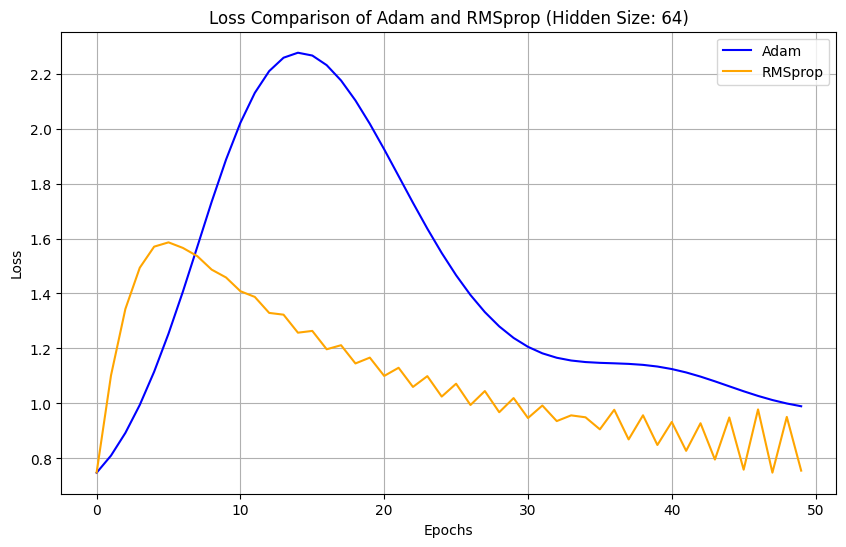

In [ ]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.

    Returns:
    - A plot showing the loss curves for both optimizers.
    """

    print("Training with Adam optimizer:")
    parameters_adam, loss_adam = train_model(X_train, y_train, hidden_size, epochs=epochs, optimizer='adam')


    print("\nTraining with RMSprop optimizer:")
    parameters_rmsprop, loss_rmsprop = train_model(X_train, y_train, hidden_size, epochs=epochs, optimizer='rmsprop')


    plt.figure(figsize=(10, 6))
    plt.plot(loss_adam, label='Adam', color='blue')
    plt.plot(loss_rmsprop, label='RMSprop', color='orange')
    plt.title(f'Loss Comparison of Adam and RMSprop (Hidden Size: {hidden_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_optimizers(x_train, y_train, hidden_size=64, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [ ]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] -= learning_rate * gradients['W1']
    parameters['b1'] -= learning_rate * gradients['b1']
    parameters['W2'] -= learning_rate * gradients['W2']
    parameters['b2'] -= learning_rate * gradients['b2']
    return parameters

2. Modify the Training Loop


In [ ]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss (learning rate {learning_rate}): {loss:.4f}")
    return parameters, loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 0, Loss (learning rate 0.001): 0.9949
Epoch 10, Loss (learning rate 0.001): 1.1674
Epoch 20, Loss (learning rate 0.001): 1.3208
Epoch 30, Loss (learning rate 0.001): 1.4504
Epoch 40, Loss (learning rate 0.001): 1.5557

Training with learning rate: 0.01
Epoch 0, Loss (learning rate 0.01): 0.8201
Epoch 10, Loss (learning rate 0.01): 1.8130
Epoch 20, Loss (learning rate 0.01): 1.8885
Epoch 30, Loss (learning rate 0.01): 1.8046
Epoch 40, Loss (learning rate 0.01): 1.7001

Training with learning rate: 0.1
Epoch 0, Loss (learning rate 0.1): 0.7836
Epoch 10, Loss (learning rate 0.1): 1.3187
Epoch 20, Loss (learning rate 0.1): 1.0407
Epoch 30, Loss (learning rate 0.1): 0.9242
Epoch 40, Loss (learning rate 0.1): 0.8553


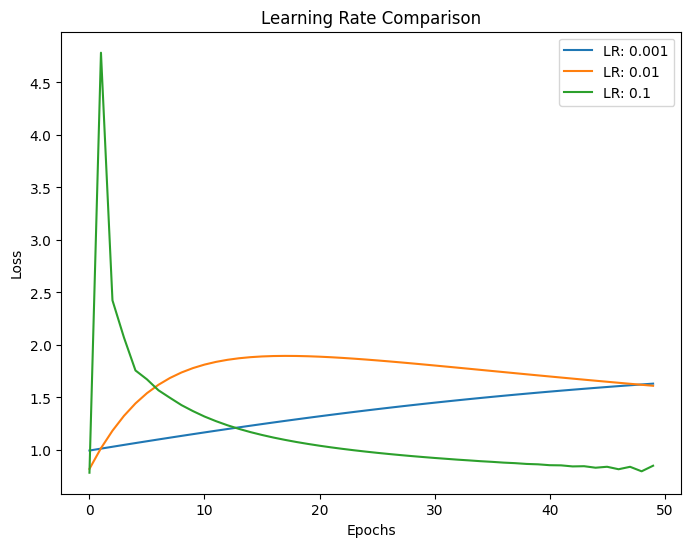

In [ ]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    histories = {}
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        _, loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=lr)
        histories[lr] = loss_history
    plt.figure(figsize=(8, 6))
    for lr in learning_rates:
        plt.plot(histories[lr], label=f"LR: {lr}")
    plt.title('Learning Rate Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

compare_learning_rates(x_train, y_train, 128)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [ ]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}

    for key in parameters.keys():
      v[key] = np.zeros_like(parameters)

    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """

    for key in parameters:
      v[key] = beta * v[key] + (1 - beta) * gradients[key]
      parameters[key] -= learning_rate * v[key]

    return parameters, v


3. Modify the Training Loop


In [ ]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    v = initialize_momentum(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} , Loss ({optimizer}): {loss:.4f}")

    return loss_history


4. Train the Model with Both Optimizers



Training with Classic SGD...
Epoch 10/50 , Loss (sgd): 1.3038
Epoch 20/50 , Loss (sgd): 1.7722
Epoch 30/50 , Loss (sgd): 1.8820
Epoch 40/50 , Loss (sgd): 1.8629
Epoch 50/50 , Loss (sgd): 1.8064

Training with SGD with Momentum...
Epoch 10/50 , Loss (momentum): 1.2159
Epoch 20/50 , Loss (momentum): 1.8961
Epoch 30/50 , Loss (momentum): 2.3246
Epoch 40/50 , Loss (momentum): 2.2492
Epoch 50/50 , Loss (momentum): 1.9891


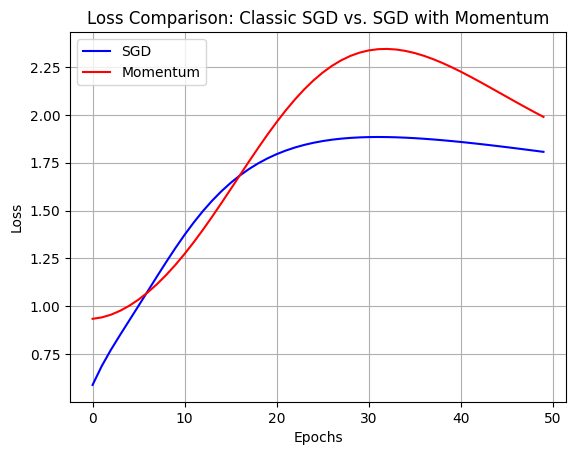

In [ ]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    results = {}

    print(f"\nTraining with Classic SGD...")
    results[0] = train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd')


    print(f"\nTraining with SGD with Momentum...")
    results[1] = train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='momentum')

    plt.plot(range(epochs), results[0], label='SGD', color='blue')
    plt.plot(range(epochs), results[1], label='Momentum', color='red')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.title("Loss Comparison: Classic SGD vs. SGD with Momentum")
    plt.show()

compare_sgd_and_momentum(x_train, y_train, hidden_size=64, epochs=50)


## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [ ]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_shuffled = X_train[permutation]
        y_shuffled = y_train[permutation]

        epoch_loss = 0
        correct_predictions = 0

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            A2, cache = forward_propagation(X_batch, parameters)

            batch_loss = compute_loss(y_batch, A2)
            epoch_loss += batch_loss

            predictions = np.argmax(A2, axis=1)
            true_labels = np.argmax(y_batch, axis=1)
            correct_predictions += np.sum(predictions == true_labels)

            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        loss_history.append(epoch_loss / (X_train.shape[0] // batch_size))
        accuracy_history.append(correct_predictions / X_train.shape[0])

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss_history[-1]:.4f}, Accuracy: {accuracy_history[-1]:.4f}")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [ ]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with mini-batch size: {batch_size}")

        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size
        )

        for epoch in range(epochs):
            print(f"Epoch {epoch}, Loss: {loss_history[epoch]:.4f}, Accuracy: {accuracy_history[epoch]:.4f}")

        results[batch_size] = {
            "loss_history": loss_history,
            "accuracy_history": accuracy_history
        }

        final_loss = loss_history[-1]
        final_accuracy = accuracy_history[-1]
        print(f"Final Loss for batch size {batch_size}: {final_loss:.4f}")
        print(f"Final Accuracy for batch size {batch_size}: {final_accuracy:.4f}")

compare_mini_batch_sizes(x_train, y_train, hidden_size=64, epochs=50, batch_sizes=[16, 32, 64])


Training with mini-batch size: 16
Epoch 1/50, Loss: 0.7163, Accuracy: 0.7640
Epoch 10/50, Loss: 0.3670, Accuracy: 0.8761
Epoch 20/50, Loss: 0.3143, Accuracy: 0.8942
Epoch 30/50, Loss: 0.2850, Accuracy: 0.9036
Epoch 40/50, Loss: 0.2630, Accuracy: 0.9120
Epoch 50/50, Loss: 0.2467, Accuracy: 0.9181
Epoch 0, Loss: 0.7163, Accuracy: 0.7640
Epoch 1, Loss: 0.5177, Accuracy: 0.8293
Epoch 2, Loss: 0.4711, Accuracy: 0.8457
Epoch 3, Loss: 0.4435, Accuracy: 0.8539
Epoch 4, Loss: 0.4230, Accuracy: 0.8593
Epoch 5, Loss: 0.4079, Accuracy: 0.8651
Epoch 6, Loss: 0.3945, Accuracy: 0.8703
Epoch 7, Loss: 0.3846, Accuracy: 0.8722
Epoch 8, Loss: 0.3750, Accuracy: 0.8747
Epoch 9, Loss: 0.3670, Accuracy: 0.8761
Epoch 10, Loss: 0.3593, Accuracy: 0.8801
Epoch 11, Loss: 0.3527, Accuracy: 0.8821
Epoch 12, Loss: 0.3455, Accuracy: 0.8845
Epoch 13, Loss: 0.3406, Accuracy: 0.8848
Epoch 14, Loss: 0.3348, Accuracy: 0.8874
Epoch 15, Loss: 0.3304, Accuracy: 0.8886
Epoch 16, Loss: 0.3262, Accuracy: 0.8900
Epoch 17, Loss:

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [ ]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):

        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)

        accuracy = compute_accuracy(y_train, A2)

        loss_history.append(loss)
        accuracy_history.append(accuracy)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history

def compute_accuracy(y_true, y_pred):
    predicted_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    return accuracy


In [ ]:
import time

def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """

    print("Training with Mini-Batch Gradient Descent...")
    start_time = time.time()
    loss_history_mini_batch, accuracy_history_mini_batch = train_model_with_mini_batches(
        X_train, y_train, hidden_size, epochs, batch_size=batch_size)
    mini_batch_time = time.time() - start_time
    final_loss_mini_batch = loss_history_mini_batch[-1]
    final_accuracy_mini_batch = accuracy_history_mini_batch[-1]

    print(f"Mini-Batch Final Loss: {final_loss_mini_batch:.4f}, "
          f"Final Accuracy: {final_accuracy_mini_batch:.4f}, "
          f"Time: {mini_batch_time:.2f} seconds")

    print("Training with Full-Batch Gradient Descent...")
    start_time = time.time()
    loss_history_full_batch, accuracy_history_full_batch = train_model_full_batch(
        X_train, y_train, hidden_size, epochs)
    full_batch_time = time.time() - start_time
    final_loss_full_batch = loss_history_full_batch[-1]
    final_accuracy_full_batch = accuracy_history_full_batch[-1]

    print(f"Full-Batch Final Loss: {final_loss_full_batch:.4f}, "
          f"Final Accuracy: {final_accuracy_full_batch:.4f}, "
          f"Time: {full_batch_time:.2f} seconds")


compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=64, epochs=50, batch_size=32)


Training with Mini-Batch Gradient Descent...
Epoch 1/50, Loss: 0.8535, Accuracy: 0.7066
Epoch 10/50, Loss: 0.4173, Accuracy: 0.8621
Epoch 20/50, Loss: 0.3609, Accuracy: 0.8807
Epoch 30/50, Loss: 0.3294, Accuracy: 0.8898
Epoch 40/50, Loss: 0.3077, Accuracy: 0.8973
Epoch 50/50, Loss: 0.2911, Accuracy: 0.9024
Mini-Batch Final Loss: 0.2911, Final Accuracy: 0.9024, Time: 97.10 seconds
Training with Full-Batch Gradient Descent...
Epoch 10/50, Loss: 1.6151, Accuracy: 0.1836
Epoch 20/50, Loss: 1.9456, Accuracy: 0.2370
Epoch 30/50, Loss: 1.9867, Accuracy: 0.2801
Epoch 40/50, Loss: 1.9445, Accuracy: 0.3301
Epoch 50/50, Loss: 1.8817, Accuracy: 0.3734
Full-Batch Final Loss: 1.8817, Final Accuracy: 0.3734, Time: 39.31 seconds
